Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0

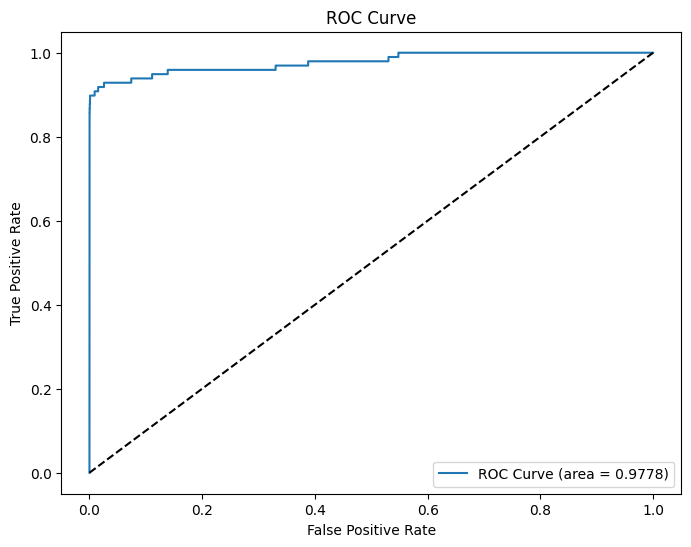

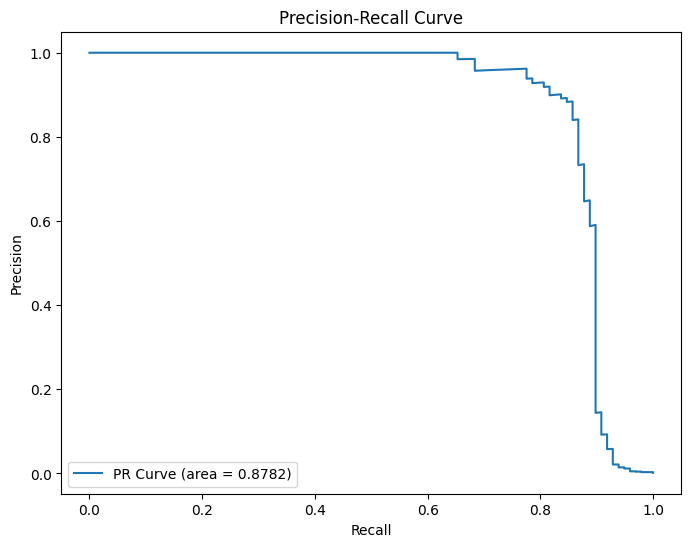

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score, f1_score, accuracy_score,
    precision_score, recall_score)
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from sklearn.preprocessing import RobustScaler
from collections import Counter
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# Load dataset
data = pd.read_csv("creditcard.csv")
# Check for NA values in each column
print(data.isnull().sum())

# Scale 'Amount' and 'Time' features, then drop the originals
data["scaled_amount"] = RobustScaler().fit_transform(data["Amount"].values.reshape(-1, 1))
data["scaled_time"] = RobustScaler().fit_transform(data["Time"].values.reshape(-1, 1))
data.drop(["Time", "Amount"], axis=1, inplace=True)

#view data
print(data.head())


# Rearrange columns for better readability
cols = data.columns.tolist()
cols = [c for c in cols if c != "Class"] + ["Class"]
data = data[cols]

# Separate features and target
X = data.drop("Class", axis=1)
y = data["Class"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Appply Borderline SMOTE to the training data
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# # Apply SMOTE to the training data
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

# #Apply ADASYN to training data
# sm = ADASYN(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # F1-Score
    f1 = f1_score(y_test, y_pred)
    print(f"F1-Score: {f1:.4f}")

    # Precision and Recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # PR-AUC Score (Precision-Recall AUC)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    print(f"PR-AUC Score: {pr_auc:.4f}")

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC Curve (area = %0.4f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall_curve, precision_curve, label="PR Curve (area = %0.4f)" % pr_auc)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.show()

# # Logistic Regression (Balanced) model
# lr_balanced = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# lr_balanced.fit(X_train, y_train)
# print("Evaluating Logistic Regression with class_weight='balanced'")
# evaluate_model(lr_balanced, X_test, y_test)

# # Logistic Regression after SMOTE
# lr_smote = LogisticRegression(random_state=42, max_iter=1000)
# lr_smote.fit(X_res, y_res)
# print("Evaluating Logistic Regression after SMOTE")
# evaluate_model(lr_smote, X_test, y_test)

# # k-Nearest Neighbors (k-NN) model with SMOTE
# knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# knn.fit(X_res, y_res)
# print("Evaluating k-Nearest Neighbors with SMOTE")
# evaluate_model(knn, X_test, y_test)

# Train LightGBM using LGBMClassifier
lgb_clf = LGBMClassifier(
    objective='binary',               # Binary classification
    boosting_type='gbdt',             # Gradient Boosting Decision Trees
    is_unbalance=True,                # Handle class imbalance
    learning_rate=0.1,                # Step size
    num_leaves=40,                    # Max leaves per tree
    max_depth=-1,                     # No limit on tree depth
    n_estimators=200,                 # Number of boosting rounds
    random_state=42
)

# Train the model on the resampled data
lgb_clf.fit(X_res, y_res)

# Evaluate the LightGBM model
print("Evaluating LightGBM Model")
evaluate_model(lgb_clf, X_test, y_test)

# # Define scale_pos_weight
# scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# xgb_clf = XGBClassifier(
#     objective='binary:logistic',    # Binary classification
#     scale_pos_weight=scale_pos_weight,  # Handle class imbalance
#     learning_rate=0.1,             # Step size
#     max_depth=36,                   # Maximum tree depth
#     n_estimators=200,              # Number of trees
#     random_state=42
# )

# # Train on resampled data
# xgb_clf.fit(X_res, y_res)

# # Evaluate the model
# print("Evaluating XGBoost Model")
# evaluate_model(xgb_clf, X_test, y_test)
